<a href="https://colab.research.google.com/github/ab320043/Ahussein-MyRepo/blob/main/AbdallahHussein5525600_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Manual Mode**

Saving bebi64i3kbb31.jpg to bebi64i3kbb31 (7).jpg


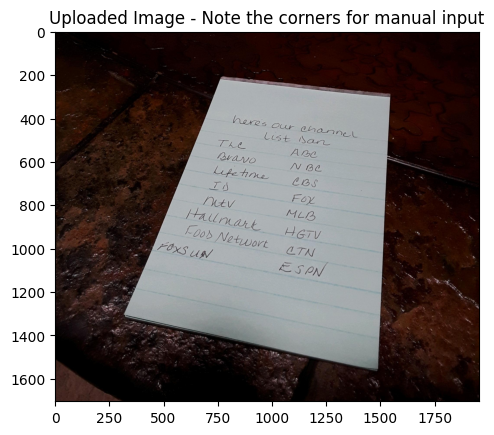

Enter the four corner points in the format: x y
Enter Top-left corner (x y): 10 40
Enter Top-right corner (x y): 420 431
Enter Bottom-right corner (x y): 378 900
Enter Bottom-left corner (x y): 472 910
Manually input corners: [[ 10.  40.]
 [420. 431.]
 [378. 900.]
 [472. 910.]]


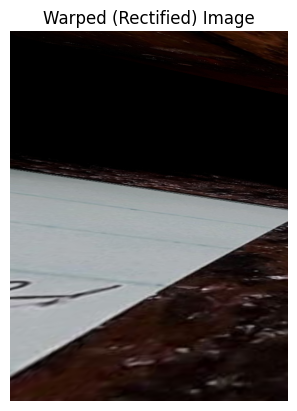

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Upload image
uploaded = files.upload()
image_path = list(uploaded.keys())[0]
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the uploaded image
plt.imshow(image)
plt.axis('on')
plt.title("Uploaded Image - Note the corners for manual input")
plt.show()

# Prompt user to enter corner coordinates manually
print("Enter the four corner points in the format: x y")
corners = []
corner_labels = ["Top-left", "Top-right", "Bottom-right", "Bottom-left"]
for label in corner_labels:
    x, y = map(int, input(f"Enter {label} corner (x y): ").split())
    corners.append([x, y])

corners = np.array(corners, dtype=np.float32)
print("Manually input corners:", corners)

# Define the target rectangle
H_out, W_out = 800, 600  # Height and Width of output image
target_corners = np.array([[0, 0], [W_out, 0], [W_out, H_out], [0, H_out]], dtype=np.float32)

# Compute the homography
def computeH(im1_pts, im2_pts):
    H, _ = cv2.findHomography(im1_pts, im2_pts)
    return H

H_matrix = computeH(corners, target_corners)

# Perform backward warping
def warpImage(im, H):
    h, w = 800, 600  # Corrected height and width
    warped = cv2.warpPerspective(im, H, (w, h))
    return warped

# Warp the image
warped_image = warpImage(image, H_matrix)

# Display the warped image
plt.imshow(warped_image)
plt.axis('off')
plt.title("Warped (Rectified) Image")
plt.show()


# **Auto Mode**

Saving bebi64i3kbb31.jpg to bebi64i3kbb31 (6).jpg


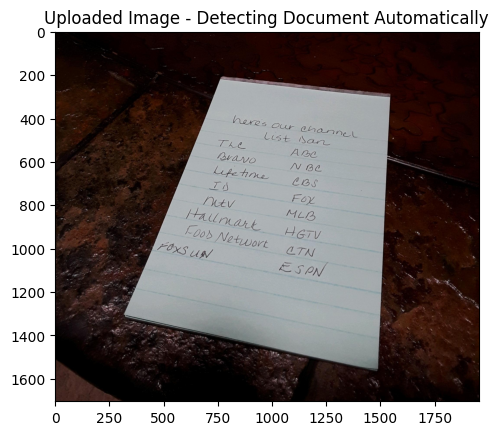

Automatically detected corners: [[656 895]
 [618 897]
 [600 935]
 [621 900]]


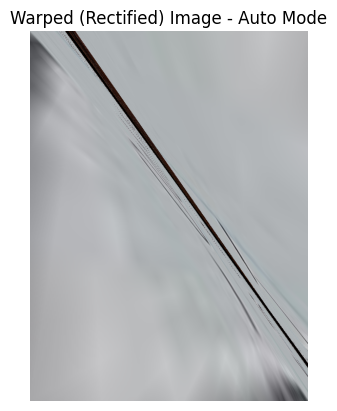

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Upload image
uploaded = files.upload()
image_path = list(uploaded.keys())[0]
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the uploaded image
plt.imshow(image)
plt.axis('on')
plt.title("Uploaded Image - Detecting Document Automatically")
plt.show()

def auto_detect_corners(image):
    """Detects document corners automatically using edge and contour detection."""
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    # Apply Gaussian Blur and Canny Edge Detection
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    edges = cv2.Canny(blurred, 50, 150)

    # Find contours
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key=cv2.contourArea, reverse=True)

    for contour in contours:
        epsilon = 0.02 * cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, epsilon, True)

        if len(approx) == 4:  # Found a quadrilateral
            return approx.reshape(4, 2)

    raise ValueError("Could not detect 4 corners. Try adjusting thresholding.")

# Detect corners
try:
    corners = auto_detect_corners(image)
    print("Automatically detected corners:", corners)

    # Define the target rectangle
    H_out, W_out = 800, 600
    target_corners = np.array([[0, 0], [W_out, 0], [W_out, H_out], [0, H_out]], dtype=np.float32)

    # Compute Homography
    def computeH(im1_pts, im2_pts):
        H, _ = cv2.findHomography(im1_pts, im2_pts)
        return H

    H_matrix = computeH(corners, target_corners)

    # Warp the image
    def warpImage(im, H):
        h, w = 800, 600
        warped = cv2.warpPerspective(im, H, (w, h))
        return warped

    warped_image = warpImage(image, H_matrix)

    # Display the warped image
    plt.imshow(warped_image)
    plt.axis('off')
    plt.title("Warped (Rectified) Image - Auto Mode")
    plt.show()

except ValueError as e:
    print(str(e))

First, the image is converted to grayscale to simplify processing. Then, edge detection (Canny filter) is applied to highlight document boundaries. The largest contour is identified, assuming it represents the document, and approximated into a quadrilateral using cv2.approxPolyDP(). If exactly four corners are detected, a homography transformation maps these points to a straightened, rectangular output. Finally, perspective warping is applied using cv2.warpPerspective(), producing a corrected version of the document